In [55]:
import pandas as pd

In [56]:
dat=pd.read_csv(r'C:\Users\KUSH\Documents\New folder\traine.csv')

In [57]:
dat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
dat.drop(['Name','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'], axis=1, inplace=True)

In [59]:
dat.head()

,PassengerId,Survived,Pclass,Sex
0,1,0,3,male
1,2,1,1,female
2,3,1,3,female
3,4,1,1,female
4,5,0,3,male


In [60]:
m=dat.Sex.replace({'male':0,'female':1})

In [61]:
dat.Sex=m

In [62]:
dat.head()

,PassengerId,Survived,Pclass,Sex
0,1,0,3,0
1,2,1,1,1
2,3,1,3,1
3,4,1,1,1
4,5,0,3,0


In [63]:
cls=pd.get_dummies(dat['Pclass']).drop([3], axis=1)
cls.head()

,1,2
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0


In [64]:
dat=pd.concat([dat,cls], axis=1)

In [65]:
dat.head()

,PassengerId,Survived,Pclass,Sex,1,2
0,1,0,3,0,0,0
1,2,1,1,1,1,0
2,3,1,3,1,0,0
3,4,1,1,1,1,0
4,5,0,3,0,0,0


In [66]:
dat.drop(['Pclass'], axis=1, inplace=True )

In [67]:
Xt=dat.drop(['Survived','PassengerId'], axis=1).values
Y=dat['Survived'].values
import numpy as nm
Xt=Xt[0:150]
Y=Y[0:150].reshape(-1,1)
Xt[0]

array([0, 0, 0], dtype=int64)

In [68]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain,ytest= train_test_split(Xt,Y)

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
log=LogisticRegression()

In [71]:
log.fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
dat2=pd.read_csv(r'C:\Users\KUSH\Documents\New folder\test.csv')
dat2.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [73]:
dat2.drop(['Cabin','Name','Age','SibSp','Parch','Ticket','Fare','Embarked'], axis=1, inplace=True)
n=dat2.Sex.replace({'male':0,'female':1})

In [74]:
dat2.Sex=n

In [75]:
dat2.head()

,PassengerId,Pclass,Sex
0,892,3,0
1,893,3,1
2,894,2,0
3,895,3,0
4,896,3,1


In [76]:
import pandas as pd
clsi=pd.get_dummies(dat2['Pclass']).drop([3],axis=1)
clsi.head()
dat2=pd.concat([dat2,clsi], axis=1)


In [77]:
dat2.head()

,PassengerId,Pclass,Sex,1,2
0,892,3,0,0,0
1,893,3,1,0,0
2,894,2,0,0,1
3,895,3,0,0,0
4,896,3,1,0,0


In [78]:
dat2.drop(['Pclass'], axis=1, inplace=True )



In [79]:
xtest=dat2.drop(['PassengerId'],axis=1).values


In [80]:
xtest[0]


array([0, 0, 0], dtype=int64)

In [81]:
xtest=xtest[0:112]
pred=log.predict(xtest)

In [82]:
from sklearn import metrics

In [83]:
metrics.accuracy_score(ytrain,pred)

0.4732142857142857

In [84]:
pred[8]

1

In [85]:
pid=dat2.PassengerId.values.reshape(-1,1)

In [86]:
for i in range(112):
    print(pid[i],':',pred[i])

[892] : 0
[893] : 1
[894] : 0
[895] : 0
[896] : 1
[897] : 0
[898] : 1
[899] : 0
[900] : 1
[901] : 0
[902] : 0
[903] : 0
[904] : 1
[905] : 0
[906] : 1
[907] : 1
[908] : 0
[909] : 0
[910] : 1
[911] : 1
[912] : 0
[913] : 0
[914] : 1
[915] : 0
[916] : 1
[917] : 0
[918] : 1
[919] : 0
[920] : 0
[921] : 0
[922] : 0
[923] : 0
[924] : 1
[925] : 1
[926] : 0
[927] : 0
[928] : 1
[929] : 1
[930] : 0
[931] : 0
[932] : 0
[933] : 0
[934] : 0
[935] : 1
[936] : 1
[937] : 0
[938] : 0
[939] : 0
[940] : 1
[941] : 1
[942] : 0
[943] : 0
[944] : 1
[945] : 1
[946] : 0
[947] : 0
[948] : 0
[949] : 0
[950] : 0
[951] : 1
[952] : 0
[953] : 0
[954] : 0
[955] : 1
[956] : 0
[957] : 1
[958] : 1
[959] : 0
[960] : 0
[961] : 1
[962] : 1
[963] : 0
[964] : 1
[965] : 0
[966] : 1
[967] : 0
[968] : 0
[969] : 1
[970] : 0
[971] : 1
[972] : 0
[973] : 0
[974] : 0
[975] : 0
[976] : 0
[977] : 0
[978] : 1
[979] : 1
[980] : 1
[981] : 0
[982] : 1
[983] : 0
[984] : 1
[985] : 0
[986] : 0
[987] : 0
[988] : 1
[989] : 0
[990] : 1
[991] : 0


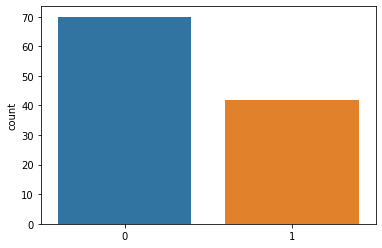

In [94]:
import seaborn as sns
%matplotlib inline
sns.countplot(x=pred,data=dat2)